# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [15]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, epochs=10, learning_rate=0.01):
        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):
                inputs = X_train[i]
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = (diferencia ** 2) / 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_by_epoch.append(train_error_acum / X_train.shape[0])

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = (diferencia ** 2) / 2
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_by_epoch.append(val_error_acum / X_validation.shape[0])

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_by_epoch[-1], '| val error:', val_error_by_epoch[-1])

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [17]:
import numpy as np

# Datos de entrenamiento y validación para la puerta AND
N_samples = 5500
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

# Generar datos aleatorios
X_data = np.random.randint(2, size=(N_samples, N_inputs))

# Calcular las etiquetas para la puerta AND
Y_data = np.logical_and(X_data[:, 0], X_data[:, 1]).astype(int)

# Dividir los datos en entrenamiento y validación
X_train = X_data[:int(N_samples * train_size)]
Y_train = Y_data[:int(N_samples * train_size)]

X_validation = X_data[int(N_samples * train_size):]
Y_validation = Y_data[int(N_samples * train_size):]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]]
Y_data (first 5 samples):
[0 0 0 1 0]


In [18]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [19]:
# Comprobar predicción del modelo sin entrenar
index = 8

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 0.5228759273442153
Prediction: 1


In [20]:
from sklearn.metrics import confusion_matrix

# Suponiendo que perceptron_and ya está definido y que X_validation, Y_validation están disponibles
predictions = []
th = 0.5  # Umbral para clasificación binaria

for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype(int)
    predictions.append(prediction)

conf_matrix = confusion_matrix(Y_validation, np.array(predictions).flatten())
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0 835]
 [  0 265]]


epoch: 0 | train error: 0.003612467463976422 | val error: 0.003230294119158253


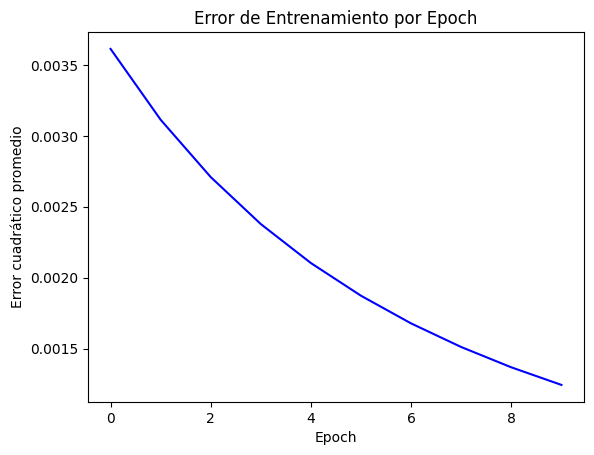

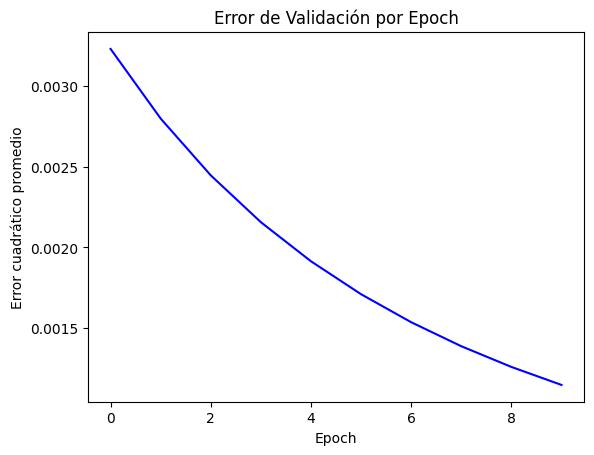

In [25]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)


In [22]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.8654519951732631
Prediction: 1


In [23]:
# Evaluamos cómo funciona el modelo en el set de validación

## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0 835]
 [  0 265]]
